In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df_country = pd.read_csv('Data_Negara_HELP.csv')
df = df_country.set_index('Negara')
df

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Negara,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [161]:
df.isnull().sum()


Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

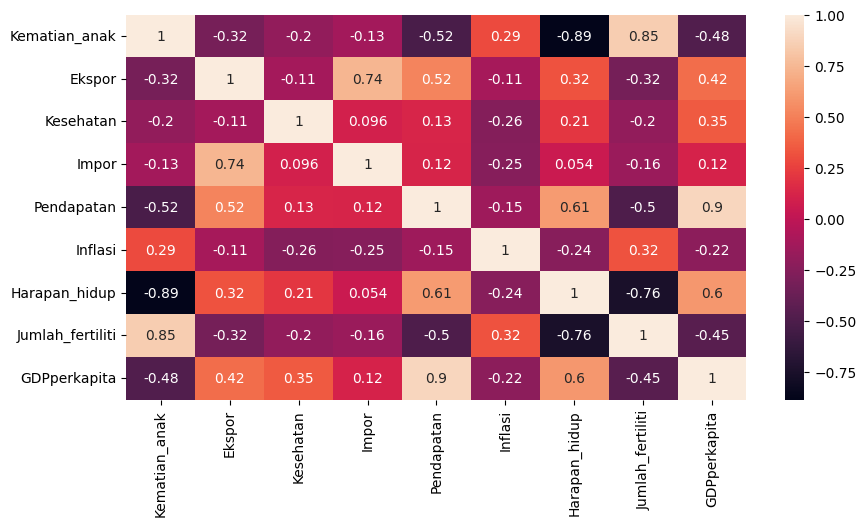

In [164]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: xlabel='Pendapatan'>

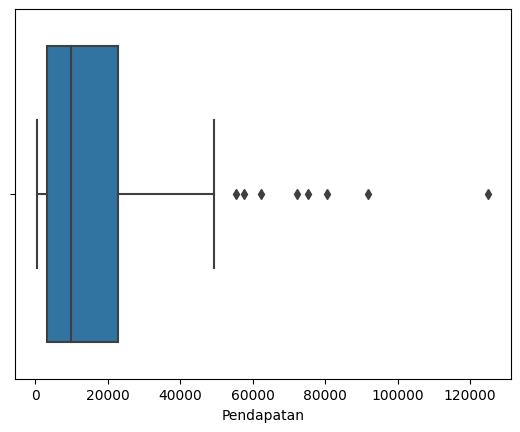

In [176]:
sns.boxplot(x='Pendapatan', data=df)

<Axes: xlabel='Kesehatan'>

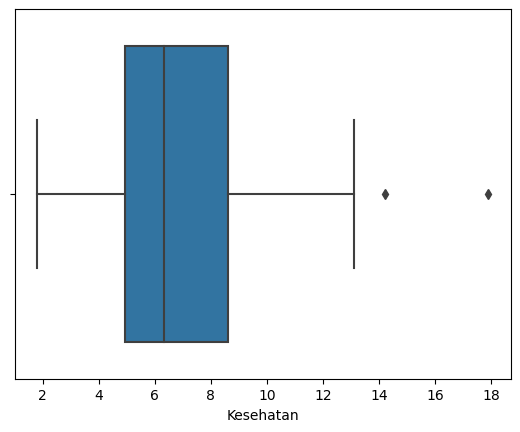

In [177]:
sns.boxplot(x='Kesehatan', data=df)

In [178]:
from scipy.stats.mstats import winsorize

dfbaru =pd.DataFrame(data = df, columns = ['Pendapatan', 'Kesehatan'])

dfbaru['Pendapatan'] = winsorize(dfbaru['Pendapatan'], limits =[0.05, 0.05])  
dfbaru['Kesehatan'] = winsorize(dfbaru['Kesehatan'], limits = [0.05, 0.05]) 

dfbaru

,Pendapatan,Kesehatan
Negara,,
Afghanistan,1610,7.58
Albania,9930,6.55
Algeria,12900,4.17
Angola,5900,2.85
Antigua and Barbuda,19100,6.03
...,...,...
Vanuatu,2950,5.25
Venezuela,16500,4.91
Vietnam,4490,6.84


<Axes: xlabel='Pendapatan'>

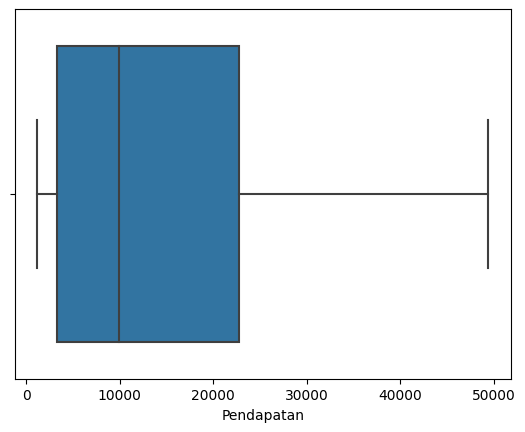

In [179]:
sns.boxplot(x='Pendapatan', data=dfbaru)

<Axes: xlabel='Kesehatan'>

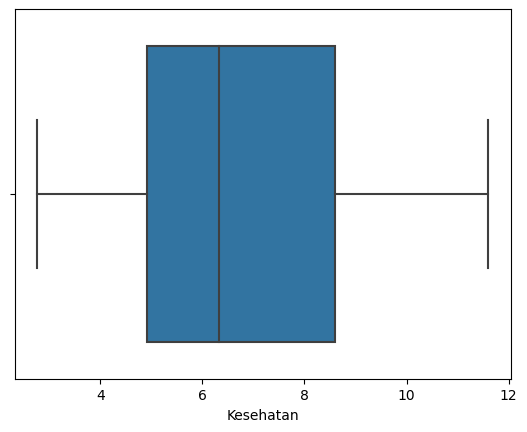

In [180]:
sns.boxplot(x='Kesehatan', data=dfbaru)

C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


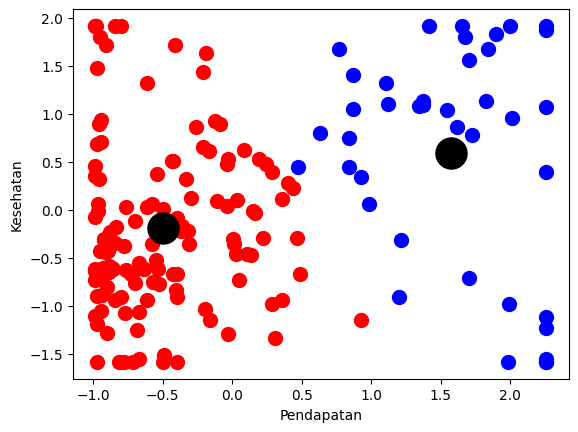

In [181]:
from sklearn.preprocessing import StandardScaler

#Scaling
sc = StandardScaler()
dfoutlier = sc.fit_transform(dfbaru.astype(float))

#Clustering Kmeans
kmeans1 = KMeans(n_clusters=2, random_state=40).fit(dfoutlier)
labels1 = kmeans1.labels_

new_dfoutlier = pd.DataFrame(data = dfoutlier, columns=['Pendapatan', 'Kesehatan'])
new_dfoutlier['label_kmeans1'] = labels1

plt.scatter(new_dfoutlier.Pendapatan[new_dfoutlier.label_kmeans1 == 0], new_dfoutlier['Kesehatan'][new_dfoutlier.label_kmeans1 == 0], c='blue', s=100, linestyle= '-')
plt.scatter(new_dfoutlier.Pendapatan[new_dfoutlier.label_kmeans1 == 1], new_dfoutlier['Kesehatan'][new_dfoutlier.label_kmeans1 == 1], c='red', s=100, linestyle= '-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s = 500);
plt.xlabel('Pendapatan')
plt.ylabel('Kesehatan')
plt.show()

C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

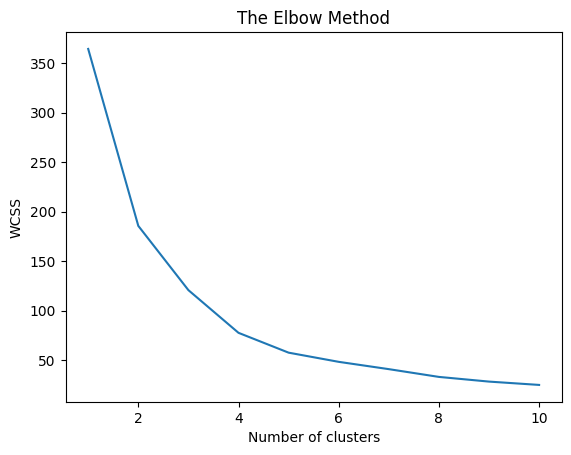

In [182]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=40)
    kmeans.fit(new_dfoutlier)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [183]:
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=40).fit(dfoutlier)

kmeans2.labels_

C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 1, 1, 1, 1, 3, 1, 0, 0, 1, 3, 2, 1, 3, 1, 0, 1, 1, 1, 1, 3, 3,
       3, 2, 1, 1, 3, 1, 1, 0, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 0,
       0, 1, 3, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 3, 0, 1, 0, 1, 1, 1, 3, 1,
       1, 3, 0, 1, 1, 1, 3, 0, 0, 0, 1, 0, 3, 1, 1, 3, 2, 1, 1, 1, 3, 3,
       3, 2, 3, 0, 3, 1, 1, 1, 1, 1, 0, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 2, 1, 3, 1, 1, 1, 3, 0, 2, 1, 1, 3, 1, 2, 1, 3, 1,
       3, 2, 0, 0, 3, 3, 0, 0, 1, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3, 1, 1, 1,
       1, 3, 3, 2, 0, 0, 3, 1, 1, 1, 1, 1, 1])

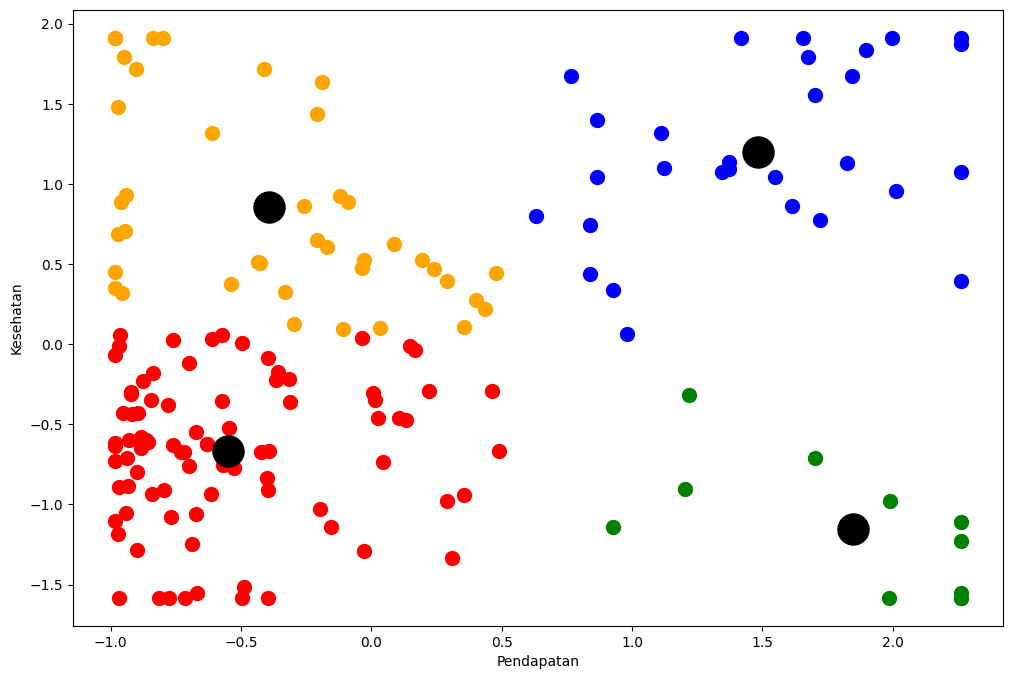

In [184]:
labels2 = kmeans2.labels_

new_dfoutlier['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(new_dfoutlier.Pendapatan[new_dfoutlier.label_kmeans2 == 0], new_dfoutlier['Kesehatan'][new_dfoutlier.label_kmeans2 == 0], c='blue', s=100, linestyle= '-')
plt.scatter(new_dfoutlier.Pendapatan[new_dfoutlier.label_kmeans2 == 1], new_dfoutlier['Kesehatan'][new_dfoutlier.label_kmeans2 == 1], c='red', s=100, linestyle= '-')
plt.scatter(new_dfoutlier.Pendapatan[new_dfoutlier.label_kmeans2 == 2], new_dfoutlier['Kesehatan'][new_dfoutlier.label_kmeans2 == 2], c='green', s=100, linestyle= '-')
plt.scatter(new_dfoutlier.Pendapatan[new_dfoutlier.label_kmeans2 == 3], new_dfoutlier['Kesehatan'][new_dfoutlier.label_kmeans2 == 3], c='orange', s=100, linestyle= '-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s = 500);
plt.xlabel('Pendapatan')
plt.ylabel('Kesehatan')
plt.show()



In [185]:
from sklearn.metrics import silhouette_score

print(silhouette_score(new_dfoutlier, labels=labels1))
print(silhouette_score(new_dfoutlier, labels=labels2))

0.4851724012112046
0.6749680811765167
